In [2]:
import pyrootutils

root = pyrootutils.setup_root(
    search_from="/home/maf4031/focus_model/notebooks/eda_datasets.ipynb",
    indicator=[".git", "pyproject.toml"],
    pythonpath=True,
    dotenv=True,
)

In [32]:
import os
import cv2
import glob
import numpy as np
from tqdm import tqdm
from skimage import io
from skimage import color
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import torch
from torchvision.transforms import transforms

from src.datamodules.components.jiang_dataset import JiangDataset

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = JiangDataset("/n/data2/hms/dbmi/kyu/lab/maf4031/incoherent_RGBchannels/test/testing_samples", transform=transform)
test_dataset = JiangDataset("/n/data2/hms/dbmi/kyu/lab/maf4031/jiang_dataset/binned_test_patches_same", transform=transform)

In [10]:
def compute_hist(img):
    # compute histogram for color channels
    red_hist = cv2.calcHist([img], [0], None, [256], [0, 255])
    green_hist = cv2.calcHist([img], [1], None, [256], [0, 255])
    blue_hist = cv2.calcHist([img], [2], None, [256], [0, 255])
    return red_hist, green_hist, blue_hist

In [15]:
train_dataset[0][0].shape

torch.Size([3, 224, 224])

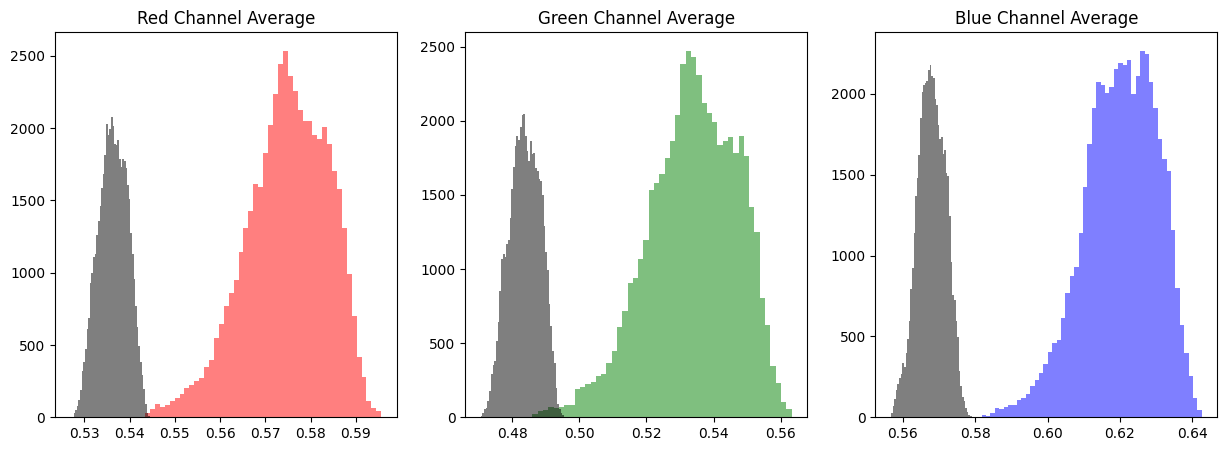

In [29]:
import torch
import matplotlib.pyplot as plt

# Load image tensors
image_tensors = [test_dataset[i][0] for i in range(len(train_dataset))]
image_tensors2 = [test_dataset[i][0] for i in range(len(test_dataset))[::10]]

# Stack image tensors into single tensor
image_tensor = torch.stack(image_tensors, dim=0)
image_tensor2 = torch.stack(image_tensors2, dim=0)

# Compute averages of color channels
averages = torch.mean(image_tensor, dim=0)
averages2 = torch.mean(image_tensor2, dim=0)

# Plot histograms of channel averages
plt.figure(figsize=(15,5))
colors = ['Red', 'Green', 'Blue']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(averages[i].flatten(), bins=50, color=colors[i].lower(), alpha=0.5) 
    plt.hist(averages2[i].flatten(), bins=50, color='black', alpha=0.5)
    plt.title(colors[i] + ' Channel Average')
plt.show()


100%|██████████| 109/109 [10:09<00:00,  5.59s/it]


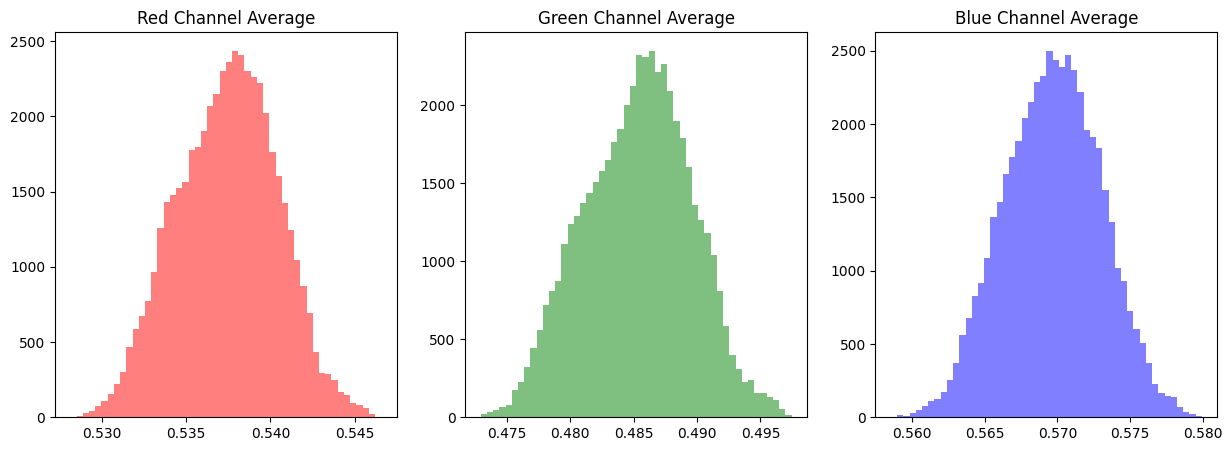

In [34]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Compute averages of color channels
averages = torch.zeros((3, 224, 224))
for images, _, _ in tqdm(dataloader):
    averages += torch.mean(images, dim=0)
averages /= len(dataloader)

# Plot histograms of channel averages
plt.figure(figsize=(15,5))
colors = ['Red', 'Green', 'Blue']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(averages[i].flatten(), bins=50, color=colors[i].lower(), alpha=0.5)
    plt.title(colors[i] + ' Channel Average')
plt.show()


In [ ]:
dataloader1 = DataLoader(train_dataset, batch_size=128, shuffle=False)

# Compute averages of color channels
averages1 = torch.zeros((3, 224, 224))
for images, _, _ in tqdm(dataloader1):
    averages1 += torch.mean(images, dim=0)
averages1 /= len(dataloader1)